In [1]:
%%shell
# Load the database
# Inspred by https://colab.research.google.com/github/tensorflow/io/blob/master/docs/tutorials/postgresql.ipynb#scrollTo=YUj0878jPyz7
sudo apt-get -y -qq update
sudo apt-get -y -qq install postgresql-14
# Start postgresql server
sudo sed -i "s/port = 5432/port = 5433/g" /etc/postgresql/14/main/postgresql.conf
sudo service postgresql start
# Set password
sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD 'pyqrlew-db'"
pip install -U pyqrlew matplotlib graphviz

UsageError: Cell magic `%%shell` not found.


In [2]:
import pyqrlew as qrl
from pyqrlew.io import PostgreSQL

DB = PostgreSQL()
dataset = DB.extract()

Error response from daemon: network with name qrlew-net already exists


In [3]:
from graphviz import Source
from IPython.display import display

def display_dot(dot_graph):
    # graph = Source(dot_graph)

    # # # Set the size of the graph
    # # graph.graph_attr['size'] = '8,6'  # Adjust the width and height as needed

    # # # Render the graph to a PNG image
    # # graph.format = 'png'
    # graph.render(filename='graph', format='png', cleanup=True)

    # # Display the graph image with a specific size
    # display(Image(filename='graph.png', width=1600))
    display(Source(dot_graph))

['extract', 'extract', 'beacon']
SELECT * FROM extract.beacon


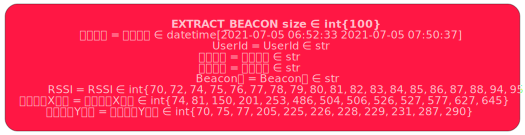

['extract', 'extract', 'census']
SELECT * FROM extract.census


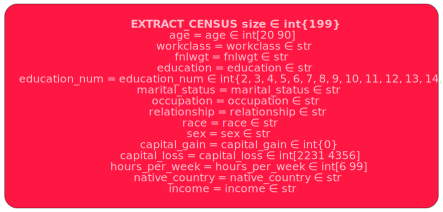

In [4]:
for p,rel in dataset.relations():
    print(p)
    print(rel.render())
    display_dot(rel.dot())

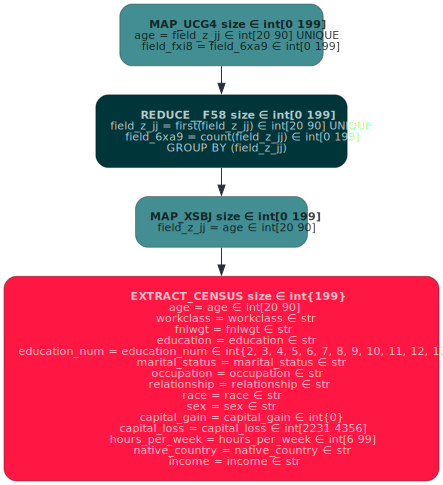

In [5]:
result = dataset.sql('SELECT age, count(age) FROM extract.census GROUP BY age')
Source(result.dot())

In [6]:
queries = [
    (("schema_name", "sch", "tab1"), 'SELECT age, count(age) FROM extract.census GROUP BY age LIMIT 10'),
    (("schema_name", "sch", "sum_age"), 'SELECT SUM(age) FROM extract.census'),
    (("schema_name", "new_sch", "bacon"), 'SELECT * FROM extract.beacon')
]

In [7]:
ds = dataset.from_queries(queries)
print(ds)

Dataset: {}
Schema: {"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "2021-07-05 06:52:33.000000000", "max": "2021-07-05 07:50:37.000000000"}}}, {"name": "UserId", "type": {"name": "Text", "text": {}}}, {"name": "所属部署", "type": {"name": "Text", "text": {}}}, {"name": "フロア名", "type": {"name": "Text", "text": {}}}, {"name": "Beacon名", "type": {"name": "Text", "text": {}}}, {"name": "RSSI", "type": {"name": "Integer", "integer": {"min": "70", "max": "95", "possibleValues": ["70", "72", "74", "75", "76", "77", "78", "79", "80", "81", "82", "83", "84", "85", "86", "87", "88", "94", "95"]}}}, {"name": "マップのX座標", "type": {"name": "Integer", "integer": {"min": "74", "max

In [8]:
ds.schema

'{"name": "schema_name", "type": {"name": "Struct", "struct": {"fields": [{"name": "sarus_data", "type": {"name": "Union", "union": {"fields": [{"name": "new_sch", "type": {"name": "Union", "union": {"fields": [{"name": "bacon", "type": {"name": "Struct", "struct": {"fields": [{"name": "検知日時", "type": {"name": "Datetime", "datetime": {"format": "%Y-%m-%d %H:%M:%S.%9f", "min": "2021-07-05 06:52:33.000000000", "max": "2021-07-05 07:50:37.000000000"}}}, {"name": "UserId", "type": {"name": "Text", "text": {}}}, {"name": "所属部署", "type": {"name": "Text", "text": {}}}, {"name": "フロア名", "type": {"name": "Text", "text": {}}}, {"name": "Beacon名", "type": {"name": "Text", "text": {}}}, {"name": "RSSI", "type": {"name": "Integer", "integer": {"min": "70", "max": "95", "possibleValues": ["70", "72", "74", "75", "76", "77", "78", "79", "80", "81", "82", "83", "84", "85", "86", "87", "88", "94", "95"]}}}, {"name": "マップのX座標", "type": {"name": "Integer", "integer": {"min": "74", "max": "645", "possible

In [9]:
ds.size

'{"statistics": {"name": "Union", "union": {"fields": [{"name": "sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "tab1", "statistics": {"struct": {"size": "10"}}}, {"name": "sum_age", "statistics": {"struct": {"size": "199"}}}]}}}, {"name": "new_sch", "statistics": {"name": "Union", "union": {"fields": [{"name": "bacon", "statistics": {"struct": {"size": "100"}}}]}}}]}}}'